### Базовые алгоритмы “машинного обучения” и  их имплементация с помощью Python

Всем привет, меня зовут Хворостяный Вячеслав. Я работаю аналитиком в компании “Ring Ukraine”, в свободное время занимаюсь изучением алгоритмов “машинного обучения”, являюсь Python энтузиастом. В этой статье я хотел бы поделится с вами примером имплементации базовых алгоритмов МЛ с помощью Python, а также провести их краткий обзор.

Разработки в сфере “машинного обучения” шагнули вперед с ошеломляющей, космической скоростью, уже сейчас можно применять сложнейшие алгоритмы не особо вникая в суть того, что происходит “под катом”. Но даже самые сложные системы состоят из атомарных, простейших частиц, которые взаимодействуют между собой.

Каждый из нас уже что слышал об “искусственном интеллекте”, ИИ повсюду, это не новость, прямо сейчас пока я набираю этот текст, алгоритм подсказывает мне где я делаю ошибки и помогает мне подобрать слова, тоже самое происходит когда вы набираете текст у себя на смартфоне. Алгоритмы работают на нас когда мы ищем что-то в интернете, читаем почту, смотрим видео на Youtube, ставим лайки в соцсетях. Идеи эти не новы, например старушка Линейная Регрессия, которая будет рассмотрена ниже, впервые была использована Френсисом Гальтоном более 130 лет назад.

В этой статье мы попытаемся разобраться в “атомах” из которых состоят эти сложные системы, немного развеять магическую дымку, опутывающую изменения, принесенные в наш мир “машинным обучением” и “искусственным интеллектом”. 


#### Линейная регрессия


Данный алгоритм является одним из самых широко используемых алгоритмов МЛ, а также самым прозрачным  и интерпретируемым. Скорей всего вы уже стыкались с ним в повседневной жизни, а может и применяли на практике. Линейная регрессия это алгоритм позволяющий отобразить линейную зависимость между двумя переменными, выражается формулой:

\begin{equation} h^{(i)} = \beta_0 + \beta_1x^{(i)} \end{equation}
где $h$ - предположение(hypothesis), $(\beta_0, \beta_1)^T$- вектор параметров, в котором и заключается вся магия, $x$ - независимая переменная

Вся суть в том, чтобы как можно лучше подобрать параметры $\beta_0$ и $\beta_1$ при заданном $x$, при этом $h$ будет отображать ожидаемое значение функции.

Линейная регрессия относится к так називаемому "обучению с учителем" или "supervised machine learning", это значит, что 
у нас уже есть некоторое количество данных где известны как заначение аргументов функции $x$ , так и значения самой функции $y$, наша задача состоит в том чтобы "обучится" на этих, уже размеченых данных, а потом применяя полученый вектор параметров к любому случайному $x$, получать соответствующий $y$.

Имея $x$ и $y$ мы можем расчитать интересующие нас параметры за формулами:

\begin{equation}
\beta_1 = \frac{\sum_{i=1}^{m} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{m} (x_i - \bar{x})^2}
\end{equation}

\begin{equation}
\beta_0 = \bar{y} - \beta_1\bar{x}
\end{equation}

Где $\bar{x}$, $\bar{y}$ - математическое ожидание от векторов $X$ и $Y$

Данные формулы являются частным случаем метода наименших квадратов, к которому мы еще вернемся, более подробно об о том как выводятся эти формулы можно узнать перейдя по ссылке https://www.wikiwand.com/en/Ordinary_least_squares


Имплементация на Python:

```python
import numpy as np
from matplotlib import pyplot as plt 

def ord_LinReg_fit(X,Y):
    x_mean = np.mean(X)
    y_mean = np.mean(Y)

    m = len(X)

    number = 0
    denom  = 0
    for i in range(m):
        number += (X[i] - x_mean)*(Y[i] - y_mean)
        denom += (X[i] - x_mean)**2

    b_1 = number/denom
    b_0 = y_mean - (b_1*x_mean)
    return b_0,b_1

# Допустим мы хотим изучить зависимость веса мозгов Y от обьема черепной коробки X
X = [3443, 3993, 3640, 4208, 3832, 3876, 3497, 3466, 3095, 4424] # см^3
Y = [1340, 1380, 1355, 1522, 1208, 1405, 1358, 1292, 1340, 1400] # граммы


max_x = np.max(X) + 100
min_x = np.min(X) - 100


reg_line_x = np.linspace(min_x, max_x, 10) # новые значения Х
b0,b1 = ord_LinReg_fit(X,Y) # вычислeние параметров
H = b0 + b1 * reg_line_x

# Визуализация
plt.plot(reg_line_x, H, c='b', label='Regression Line')
plt.scatter(X, Y, c='g', label='Known values')
```
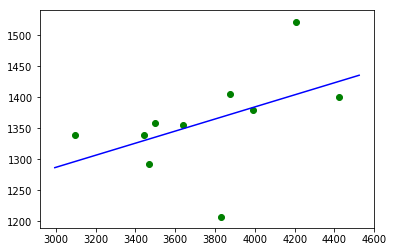

Для того чтобы подобрать параметры вектора нужно также ввести такие понятия как "кост-функция" и "градиетный спуск".

	
